# A Tour of Probability Distributions II - Continuous Distributions

<h1>Outline</h1>

- Continuous Distributions:
    - Uniform
    - Beta
    - Exponential
    - Gamma
    - Normal
    - Student's T
    - Chi-Square

# Continuous Distributions

A random variable is a mathematical formalization of a quantity or object which depends on random events. It is a mapping or function from possible outcomes in a sample space to a measurable space.

Continuous distributions have an infinite amount of points along an unbroken function, whereas discrete random variables are valued in a finite set, or intervals of real numbers.<sup>[1]</sup>

The code below has been adapted from the PyMC library's documentation (https://www.pymc.io/projects/docs/en/stable/api/distributions.html). We'll start by importing some libraries for plotting:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import arviz as az
plt.style.use('arviz-darkgrid')
plt.rcParams['figure.figsize'] = (6,4)

# Uniform Distribution

For a uniform distribution, the probability of a draw from any interval within the interval is proportional to the length of the interval. It theoretically takes on a constant value, however sampling variability does occur.

<h2>PDF: $f(x) = \frac{1}{b-a} ~~x \in (a,b)$</h2>
<h2>Expected Value: $\frac{a+b}{2}$</h2>
<h2>Variance: $\frac{(b-a)^2}{12}$</h2>

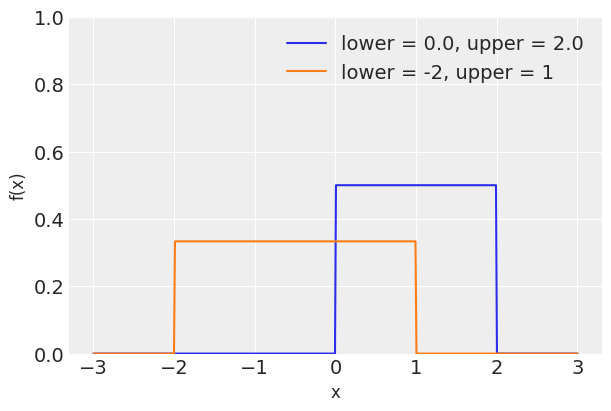

In [3]:
x = np.linspace(-3, 3, 500)
ls = [0., -2]
us = [2., 1]
for l, u in zip(ls, us):
    y = np.zeros(500)
    y[(x<u) & (x>l)] = 1.0/(u-l)
    plt.plot(x, y, label='lower = {}, upper = {}'.format(l, u))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 1)
plt.legend(loc=1)
plt.show()

# Beta Distribution

The Beta distribution is a continuous distribution often dubbed the probability distribution of probabilities, as it is a continuous distribution on the interval $(0,1)$. It can be used to infer the probability of an event when we have information about the volumes of successes and failures.<sup>[3]</sup>

A random variable is said to have the Beta distribution with parameters $a$ and $b$, where $a \gt 0$ and $b \gt 0$, if the PDF is:

<h2>PDF: $f(x) = \frac{ \Gamma(a+b) }{ \Gamma(a) \Gamma(b) } x^{a-1} (1-x)^{b-1}, ~~x \in (0,1)$</h2>
<h2>Expected Value: $\mu = \frac{a}{a+b}$</h2>
<h2>Variance: $\frac{ \mu(1-\mu) }{ a+b+1 }$</h2>

The Beta distribution is a generalization of the Uniform distribution. The $Beta(1,1)$ and $Unif(0,1)$ distributions are the same. By varying the values of $a$ and $b$, the PDF takes on different shapes.<sup>[1]</sup>

- If $a \lt 1$and $ \lt 1$, the PDF is U-shaped and opens upward
- If $a \gt 1$and $ \gt 1$, the PDF opens downward
- If $a=b$, the PDF is symmetric about $0.5$
- If $a \gt b$, the PDF favors values lower than $0.5$
- If $a \lt b$, the PDF favors values greater than $0.5$

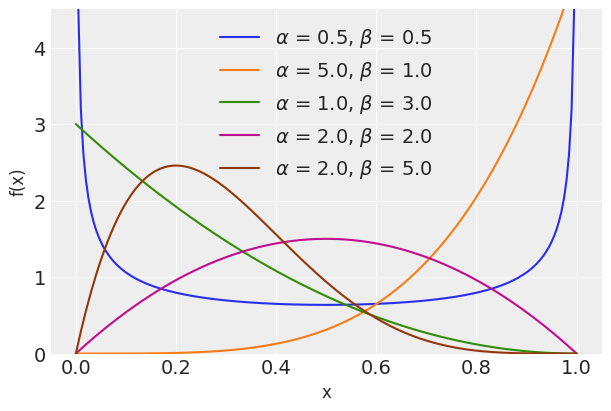

In [4]:
x = np.linspace(0, 1, 200)
alphas = [.5, 5., 1., 2., 2.]
betas = [.5, 1., 3., 2., 5.]
for a, b in zip(alphas, betas):
    pdf = st.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

Conjugate Prior of the Binomial: In the Bayesian approach to statistics, the prior for a parameter is its distribution before observing data. The posterior is the distribution for the parameter after observing data. Beta is the conjuage prior of the Binomial, because if you have a Beta-distributed prior on $p$ in a Binomial, then the posterior distribution on $p$ given the Binomial data is also Beta-distributed.<sup>[1]</sup>

# Exponential Distribution

The Exponential distribution infers the probability of the waiting time between events. The Poisson distribution is used to describe a counting process where events happen at a random but given rate, and the Exponential distribution describes the probability of waiting times between events for the Poisson distribution.<sup>[4]</sup>

Its discrete counterpart is the Geometric distribution, which counts the number of failures before the first success in a sequence of Bernoulli trials. An Exponential random variable represents the waiting time until the first arrival of success. The average number of successes in a time interval length $t$ is $\lambda t$.<sup>[1]</sup>

<h2>PDF: $f(x) = \lambda e^{-\lambda x}$</h2>
<h2>Expected Value: $\frac{1}{\lambda}$</h2>
<h2>Variance: $\frac{1}{\lambda^2}$</h2>

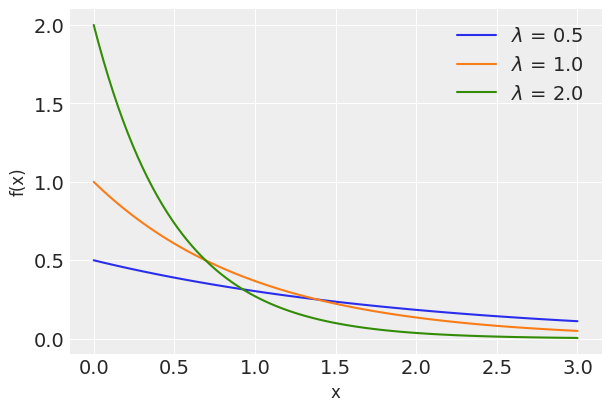

In [7]:
x = np.linspace(0, 3, 100)
for lam in [0.5, 1., 2.]:
    pdf = st.expon.pdf(x, scale=1.0/lam)
    plt.plot(x, pdf, label=r'$\lambda$ = {}'.format(lam))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Gamma Distribution

The Gamma distribution is used to model continuous variables that are always positive and have skewed distributions. It is a generalization of the Exponential (and Chi-Square) distribution, but while an Exponential random variables represents the waiting time for the first success under conditions of memoryless, the Gamma distribution gives us the waiting time until a number of successes occur. The total waiting time for $n$ arrivals is distributed $Gamma(n, \lambda)$, making Gamma the continuous analog of the discrete Negative Binomial distribution.<sup>[1]</sup>

"The Exponential distribution only infers the probability of waiting time until the first event, however the Gamma distribution gives us the probability of the waiting time until the $n^{th}$ event."
- Howell, E. (2022, April 18). Gamma Distribution Simply Explained. Towards Data Science. https://towardsdatascience.com/gamma-distribution-simply-explained-d95a9de16278

<h2>PDF: $f(x) = \frac{1}{\Gamma(a)} (\lambda x)^a e^{-\lambda x} \frac{1}{x}$</h2>

- where $\Gamma$ is the gamma function: https://en.wikipedia.org/wiki/Gamma_function

<h2>Expected Value: $\frac{\alpha}{\lambda}$</h2>
<h2>Variance: $\frac{\alpha}{\lambda^2}$</h2>

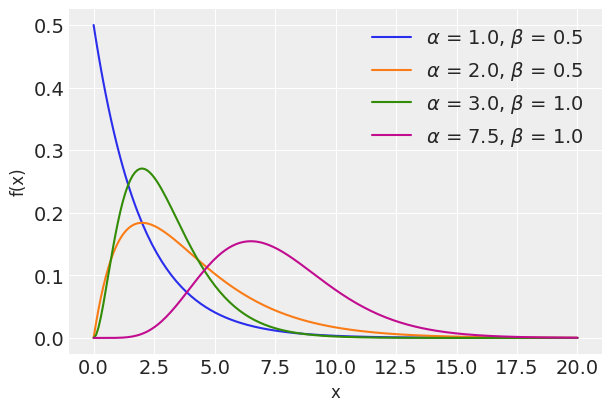

In [10]:
x = np.linspace(0, 20, 200)
alphas = [1., 2., 3., 7.5]
betas = [.5, .5, 1., 1.]
for a, b in zip(alphas, betas):
    pdf = st.gamma.pdf(x, a, scale=1.0/b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Normal Distribution

The Normal distribution is widely used in statistics because the central limit theorem says that the sample mean of i.i.d. random variables will approach a Normal distribution as the sample size grows, regardless of the initial distribution.<sup>[1]</sup>

The Normal distribution's location and form are determined by two parameters, the mean $\mu$ and variance $\sigma^2$. In the standard normal distribution, the mean, median and mode are equal. The shape of the normal curve depends only on the standard deviation, so all normal curves can be standardized such that $\mu=0$ and $\sigma=1$.

<h2>PDF: $f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{ \frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 },
    ~~x \in (-\infty, \infty)$</h2>
<h2>Expected Value: $\mu$</h2>
<h2>Variance: $\sigma^2$</h2>

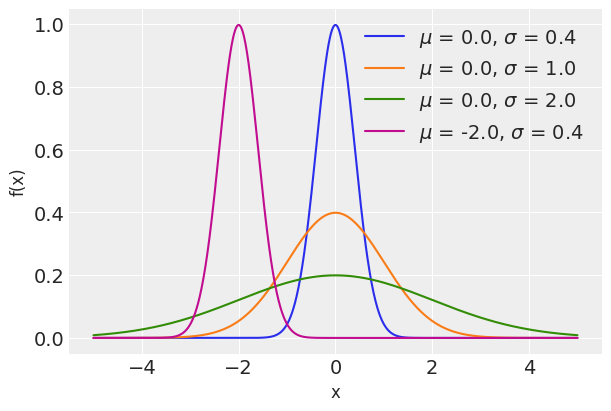

In [5]:
x = np.linspace(-5, 5, 1000)
mus = [0., 0., 0., -2.]
sigmas = [0.4, 1., 2., 0.4]
for mu, sigma in zip(mus, sigmas):
    pdf = st.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Student's T-Distribution

T-Distributions are witnessed when sampling from data that are approximately Gaussian, and this phenomena makes for a useful shortcut when describing uncertainty or error, related to sampling for the purpose of estimating population statistics. Compared to the standard Gaussian distribution, it shows longer tails and taller shoulders.

Whereas the Gaussian distribution has two parameters, the t-distribution only has one - the number of degrees of freedom. Degrees of freedom equate to the number of pieces of information used to describe a population quantity. For example, the mean has $n$ degrees of freedom, since all $n$ observations in the sample are used to calculate the estimate of the population mean.

<h2>PDF: $\frac{ \Gamma((n+1)/2) }{ \sqrt{n \pi} \Gamma(n/2) } (1 + x^2/n)^{-(n+1)/2}, 
    ~~x \in (-\infty, \infty)$</h2>

- where $\Gamma$ is the gamma function: https://en.wikipedia.org/wiki/Gamma_function

<h2>Expected Value: $0$ if $n \gt 1$</h2>
<h2>Variance: $\frac{n}{n-2}$ if $n \gt 2$</h2>

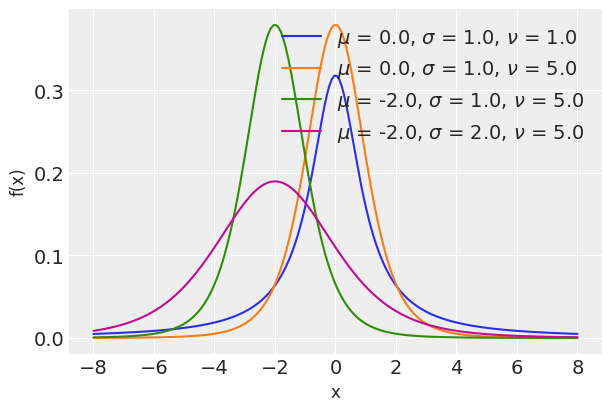

In [6]:
x = np.linspace(-8, 8, 200)
mus = [0., 0., -2., -2.]
sigmas = [1., 1., 1., 2.]
dfs = [1., 5., 5., 5.]
for mu, sigma, df in zip(mus, sigmas, dfs):
    pdf = st.t.pdf(x, df, loc=mu, scale=sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}, $\nu$ = {}'.format(mu, sigma, df))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Lognormal Distribution

If the logarithm of a set of values have a normal distribution, the values are said to havec a lognormal distribution. Sample from a $\mathcal{N}(\mu, \sigma)$, and $e^x$ will be log-normally distributed.

<h2>PDF: $f(x \mid \mu, \tau) =
    \frac{1}{x} \sqrt{\frac{\tau}{2\pi}}
    \exp\left\{ -\frac{\tau}{2} (\ln(x)-\mu)^2 \right\}$</h2>

<h2>Expected Value: $\theta = e^{\mu + \sigma^2/2}$</h2>
<h2>Variance: $\theta^2(e^{\sigma^2}-1)$</h2>

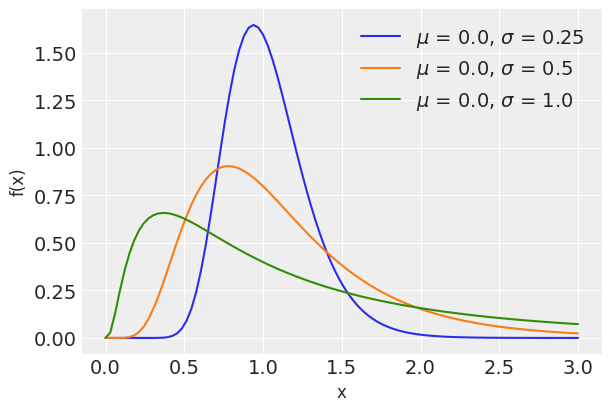

In [13]:
x = np.linspace(0, 3, 100)
mus = [0., 0., 0.]
sigmas = [.25, .5, 1.]
for mu, sigma in zip(mus, sigmas):
    pdf = st.lognorm.pdf(x, sigma, scale=np.exp(mu))
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Chi-Square Distribution

The Chi-Square distribution is a special case of the Gamma; it is $Gamma(\frac{n}{2}, \frac{1}{2})$, and is the result of summing up $\nu$ random variables from the standard Normal distribution. In statistics, it is related to the distribution of sample variance, which can be used to estimate the true variance of a distribution.<sup>[5]</sup>

Consider a set of standard normal variables $z_i$, where $i = 1, \ldots, z$ that are i.i.d. with mean $\mu=0$ and standard deviation $\sigma=1$. Define a random variable $\chi^2 = \sum_i z_i^2$, for $i = 1, \ldots, \nu$ degrees of freedom. The variable has a Chi-Square distribution with $\nu$ (nu) degrees of freedom. The number of degrees of freedom dictates the shape. <b>(Brownlee?)</b>

<h2>PDF: $\frac{ 1 }{ 2^{n/2} \Gamma(n/2) } x^{n/2-1} e^{-x/2}, ~~x \in (0, \infty)$</h2>

- where $\Gamma$ is the gamma function: https://en.wikipedia.org/wiki/Gamma_function

<h2>Expected Value: $n$</h2>
<h2>Variance: $2n$</h2>

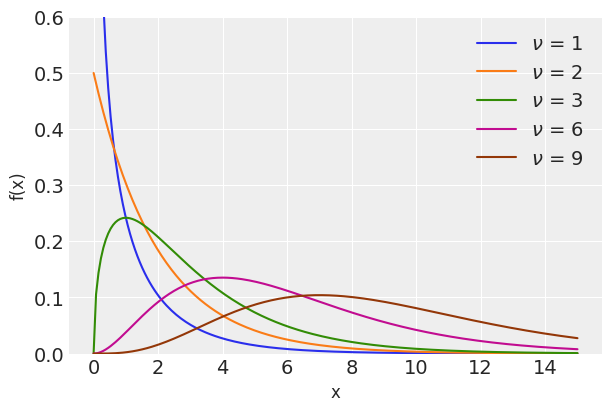

In [14]:
x = np.linspace(0, 15, 200)
for df in [1, 2, 3, 6, 9]:
    pdf = st.chi2.pdf(x, df)
    plt.plot(x, pdf, label=r'$\nu$ = {}'.format(df))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 0.6)
plt.legend(loc=1)
plt.show()

# References

1. Blitzstein, J. (2019). Introduction to Probability (2nd ed.). Harvard University and Stanford University. https://drive.google.com/file/d/1VmkAAGOYCTORq1wxSQqy255qLJjTNvBI/view</br>
<i>online cheat sheet:</i> https://static1.squarespace.com/static/54bf3241e4b0f0d81bf7ff36/t/55e9494fe4b011aed10e48e5/1441352015658/probability_cheatsheet.pdf

2. Brownlee, J. (2021). Probability for Machine Learning (v1.9 ed.). Dr. Jason Brownlee

3. Howell, E. (2022, July 21). Beta Distribution Simply Explained. Towards Data Science. https://towardsdatascience.com/beta-distribution-simply-explained-839b3acde6e9

4. Howell, E. (2022, April 15). Exponential Distribution Simply Explained. Towards Data Science. https://towardsdatascience.com/exponential-distribution-simply-explained-349d05b1bdb8

5. Howell, E. (2022, May 20). Chi-Square Distribution Simply Explained. Towards Data Science. https://towardsdatascience.com/chi-square-distribution-simply-explained-87f707ba631a

6. (n.d.). PyMC API. Distributions. https://www.pymc.io/projects/docs/en/stable/api/distributions.html